# **Project for PFDA - Bank Transaction Dataset for Fraud Detection**
___

This notebook contains my analysis of a dataset of [Bank Transactions for Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data) which I sourced from Kaggle. 

**Author: Brianne McGrath**

___


### **Dataset Overview**
___

### **Imports**
___

In [59]:
#import necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### **Loading Data & Initial Inspection**
___

Load the Bank Transaction dataset.

In [3]:
#loading dataset
df = pd.read_csv('bank_transactions_data_2.csv')

In [4]:
#reviewing first few rows of dataset
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [5]:
#checking a random sample of dataset
df.sample(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
768,TX000769,AC00233,445.79,2023-07-07 17:19:39,Debit,Las Vegas,D000308,207.157.126.125,M052,ATM,52,Doctor,161,1,717.99,2024-11-04 08:12:05
2400,TX002401,AC00370,131.69,2023-10-16 16:22:32,Credit,Denver,D000044,30.229.179.194,M067,Branch,53,Engineer,59,1,2958.43,2024-11-04 08:07:03
1289,TX001290,AC00138,355.00,2023-08-29 16:50:17,Credit,Fort Worth,D000052,115.241.186.164,M053,Online,26,Student,33,1,185.47,2024-11-04 08:10:34
2162,TX002163,AC00205,26.30,2023-12-12 16:57:29,Debit,Virginia Beach,D000210,42.219.228.159,M029,ATM,32,Doctor,33,1,7473.73,2024-11-04 08:09:28
729,TX000730,AC00395,371.47,2023-05-30 16:15:10,Credit,Milwaukee,D000661,32.71.250.58,M097,Branch,24,Student,58,1,1187.04,2024-11-04 08:07:09


In [6]:
#displaying information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df.shape

(2512, 16)

In [11]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [10]:
df['TransactionType'].unique()

array(['Debit', 'Credit'], dtype=object)

In [33]:
df['LoginAttempts'].unique()

array([1, 3, 5, 2, 4], dtype=int64)

### **Data Cleaning**

In [8]:
# checking for missing values 
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [32]:
#checking for duplicated values 
df.duplicated().sum()

0

### **Data Analysis and Visualisation:**
___

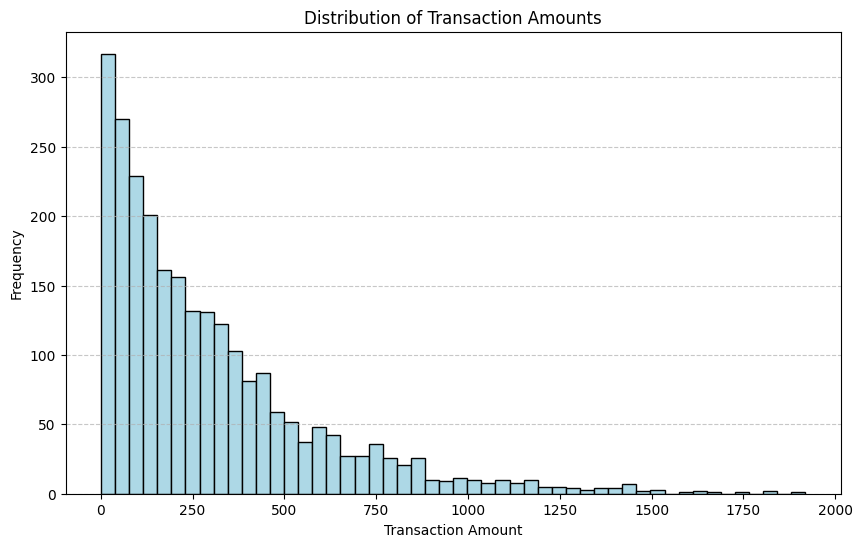

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(df['TransactionAmount'], bins=50, color='lightblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


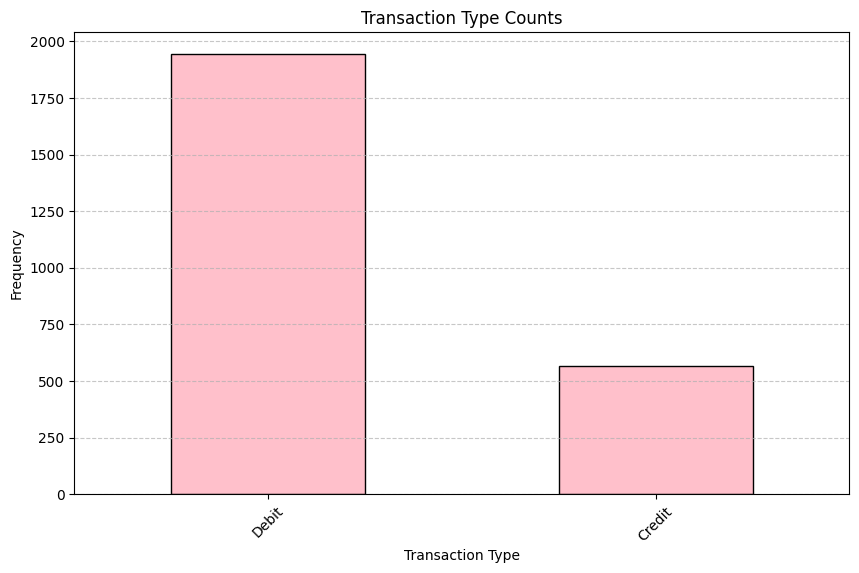

In [50]:

transaction_type_counts = df['TransactionType'].value_counts()
transaction_type_counts.plot(kind='bar', figsize=(10, 6), color='pink', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Transaction Type Counts')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()




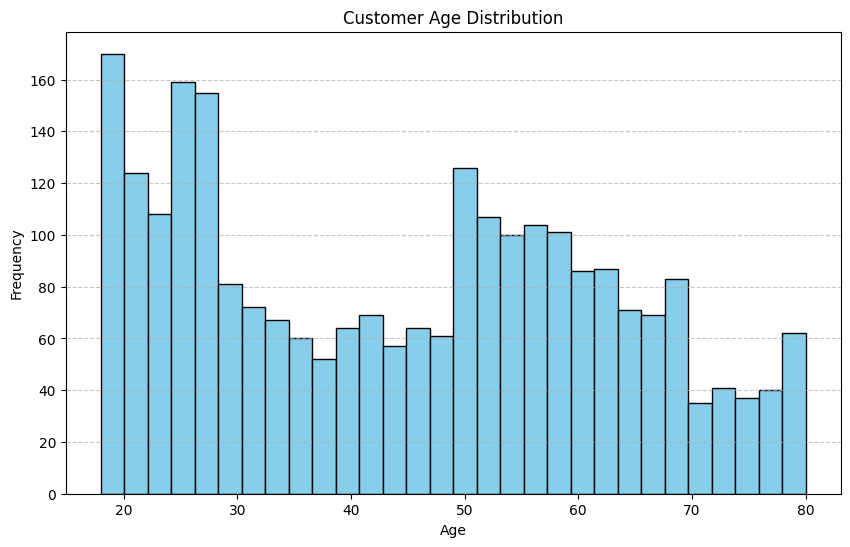

In [46]:
plt.figure(figsize=(10, 6))
df['CustomerAge'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




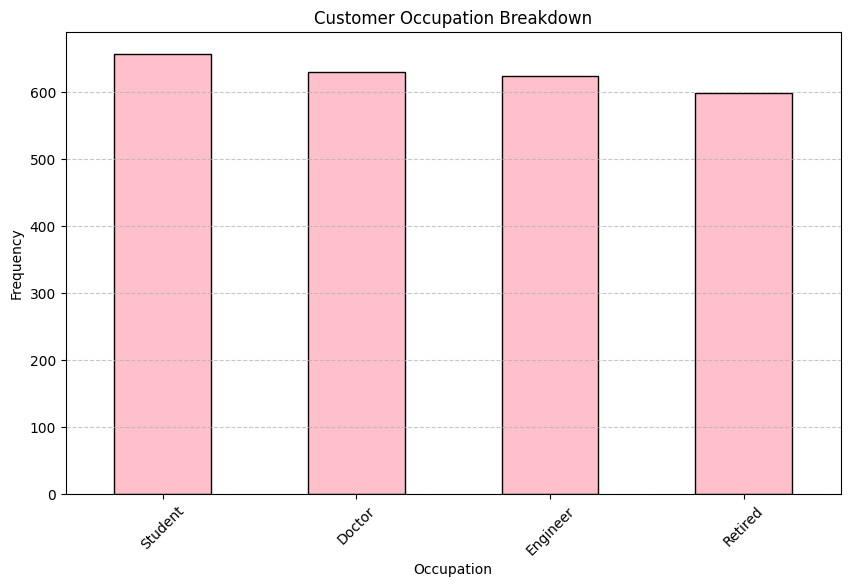

In [47]:
occupation_counts = df['CustomerOccupation'].value_counts()
occupation_counts.plot(kind='bar', figsize=(10, 6), color='pink', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Customer Occupation Breakdown')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

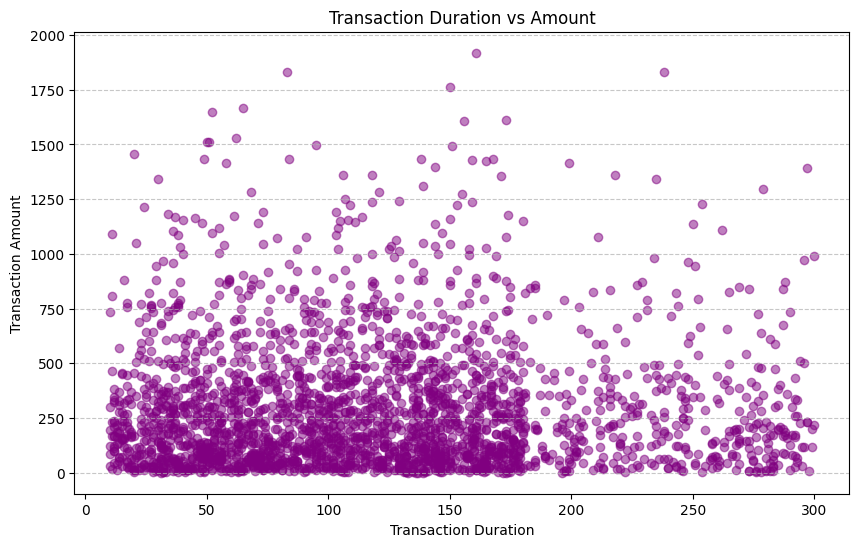

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df['TransactionDuration'], df['TransactionAmount'], alpha=0.5, color='purple')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Transaction Duration vs Amount')
plt.xlabel('Transaction Duration')
plt.ylabel('Transaction Amount')
plt.show()


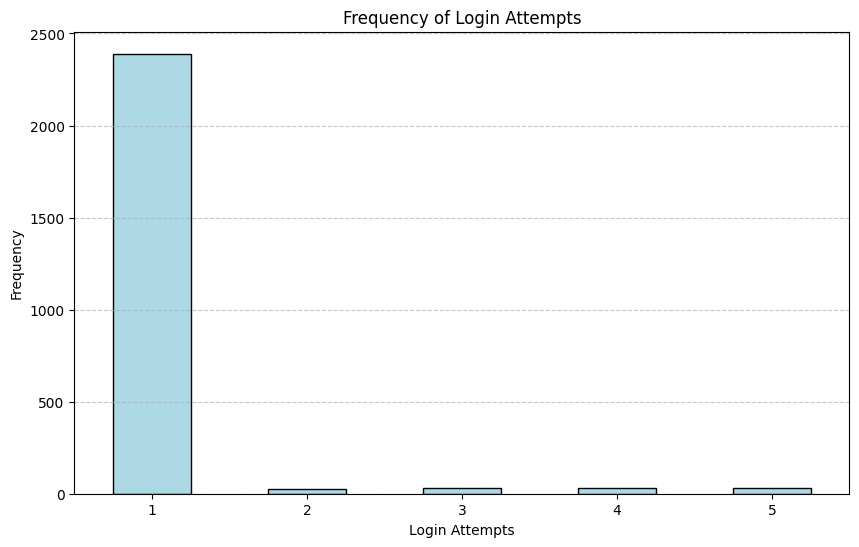

In [56]:
plt.figure(figsize=(10, 6))
df['LoginAttempts'].value_counts().sort_index().plot(kind='bar', color='lightblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Frequency of Login Attempts')
plt.xlabel('Login Attempts')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


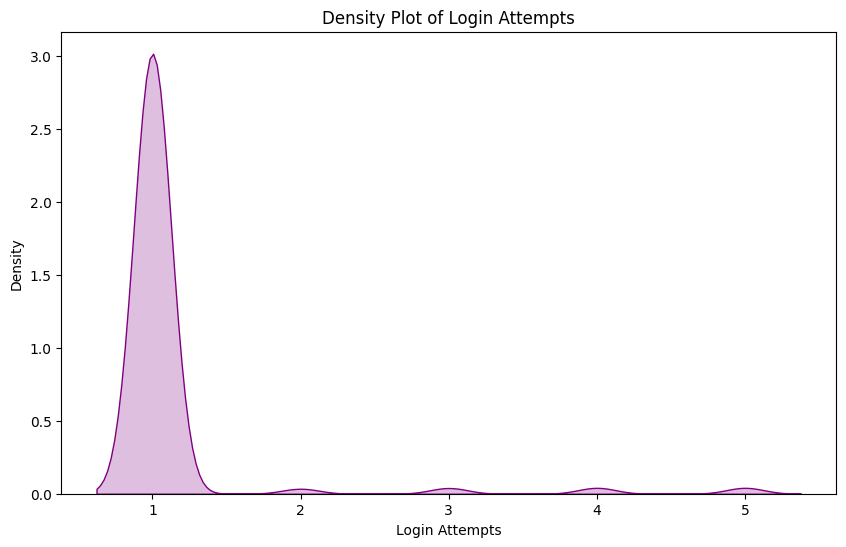

In [61]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['LoginAttempts'], fill=True, color='purple')
plt.title('Density Plot of Login Attempts')
plt.xlabel('Login Attempts')
plt.ylabel('Density')
plt.show()
